In [302]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("survey_results_public.csv")

In [303]:
df.head()  

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [304]:
#renaming
df = df[["Country","EdLevel","YearsCodePro","Employment","ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly":"Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",NaN


In [305]:
#droping null values from dataset
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38071 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       38071 non-null  object 
 1   EdLevel       38054 non-null  object 
 2   YearsCodePro  37935 non-null  object 
 3   Employment    38067 non-null  object 
 4   Salary        38071 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [307]:
#droping all not a number from given columns in our datasets
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [308]:
#droped employment column
df = df[df["Employment"] == "Employed, full-time"]
df = df.drop("Employment" , axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31382 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31382 non-null  object 
 1   EdLevel       31382 non-null  object 
 2   YearsCodePro  31382 non-null  object 
 3   Salary        31382 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [309]:
#counts the number of entries in the data
df['Country'].value_counts()

Country
United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
                                                        ... 
Haiti                                                      1
Zambia                                                     1
Suriname                                                   1
Somalia                                                    1
Seychelles                                                 1
Name: count, Length: 155, dtype: int64

In [310]:
def shorten_categories(categories, cutoff): #categories are value counts & cutoff where we adjust ormake cutoffs whatever we want
        categorical_map = {}
        for i in range (len(categories)):
            if categories.values[i] >= cutoff:
                categorical_map[categories.index[i]] = categories.index[i]
            else:
                categorical_map[categories.index[i]]= 'Other'
        return categorical_map

In [311]:
#execute functions by mapping countries listing all the values less than 400
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
Other                                                   8643
United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
France                                                  1126
Brazil                                                  1014
Spain                                                    858
Netherlands                                              701
Australia                                                700
Italy                                                    667
Poland                                                   572
Sweden                                                   561
Russian Federation                                       425
Switzerland                                              416
Name: count, dty

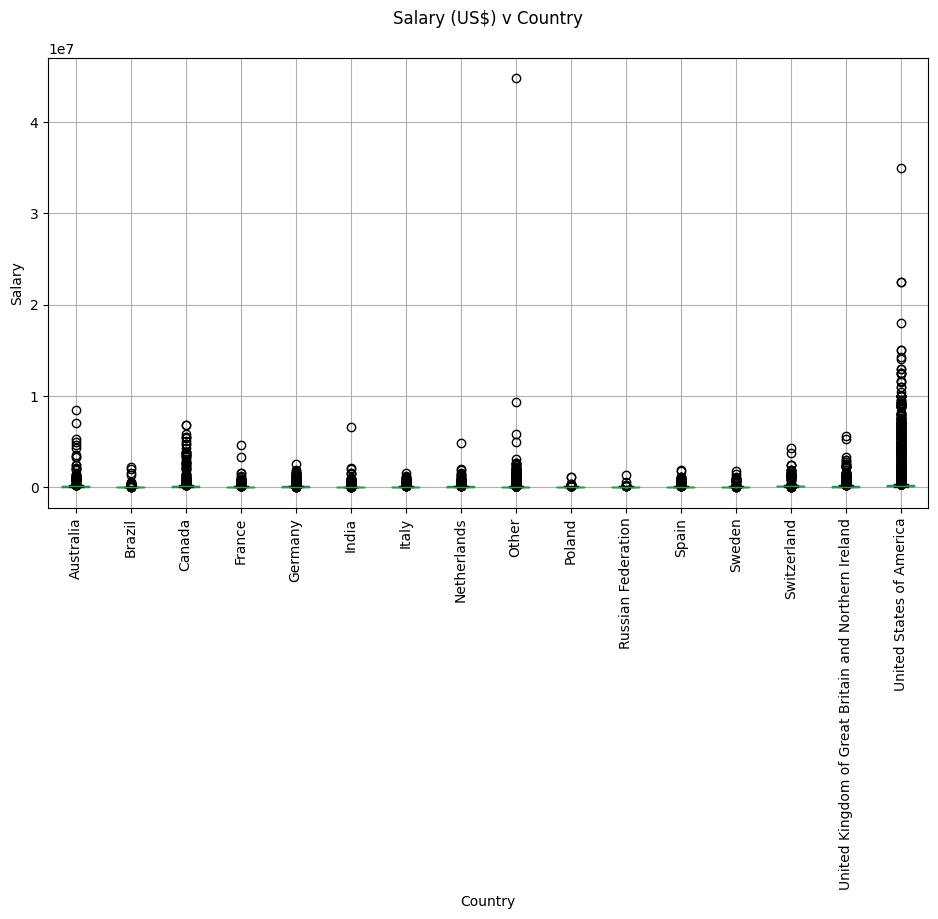

In [312]:
#subboxplot
fig, ax = plt.subplots( 1 , 1 , figsize=(11,6))
df.boxplot('Salary','Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [313]:
df=df[df["Salary"] <= 200000 ]
df = df[df["Salary"] >= 100000]
df= df[df['Country'] != 'Other']

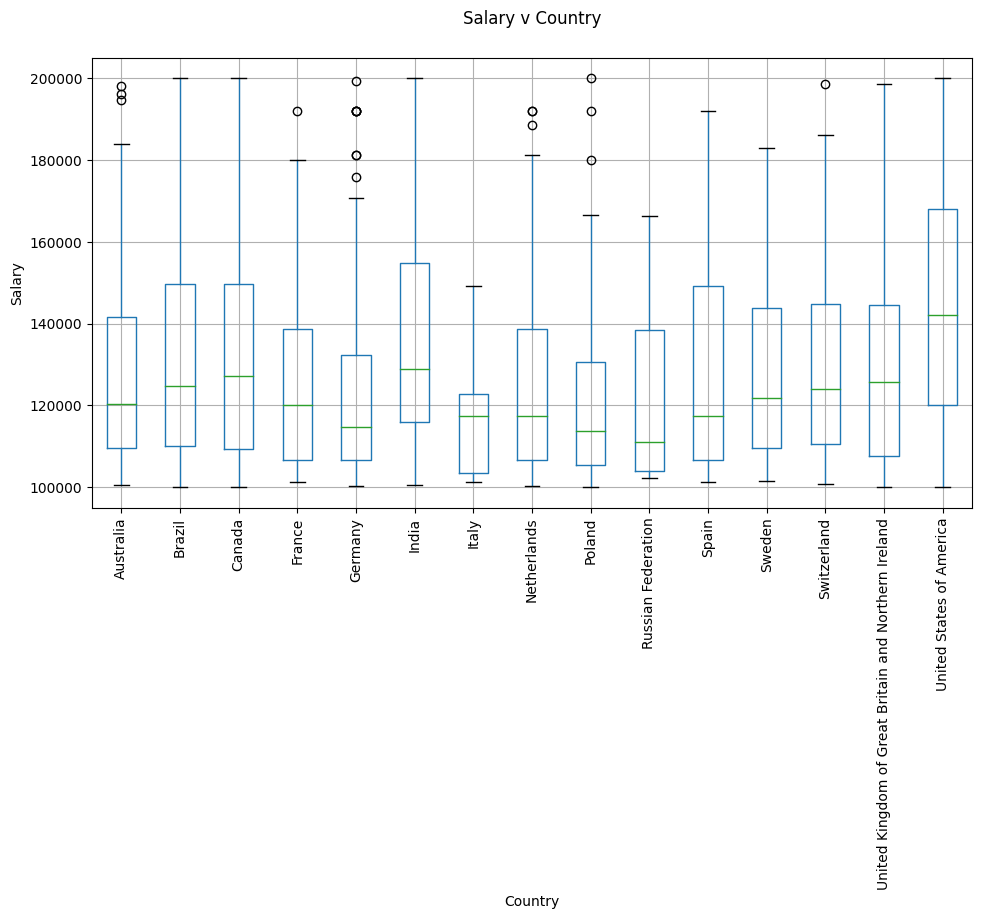

In [314]:
#subboxplot
fig, ax = plt.subplots( 1 , 1 , figsize=(11,6))
df.boxplot('Salary','Country', ax=ax)
plt.suptitle('Salary v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [315]:
df ["YearsCodePro"].unique()

array(['5', '14', '21', '15', '25', '10', '12', '20', '17', '3', '24',
       '11', '1', '23', 'Less than 1 year', '18', '7', '4', '9', '2',
       '19', '46', '8', '32', '13', '22', '6', '28', '31', '16', '37',
       '26', '42', '38', '35', '27', '30', '34', '41', '40', '29', '36',
       '33', '39', '48', '44', '43', 'More than 50 years', '45', '49'],
      dtype=object)

In [316]:
import math
import pandas as pd
import numpy as np

def clean_experience(x):
    if pd.isna(x) or x == '':
        return np.nan
    if x == 'More Than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    if ',' in x:
        x = x.replace(',', '')  # Remove commas from the string
    try:
        return float(x)
    except ValueError:
        return np.nan

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)


In [317]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)', 'Something else',
       'Primary/elementary school'], dtype=object)

In [318]:
#to encode into 0 1 3 as it is in the form of string...so converting into a float kinda values to classify into short machine learning model
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelors degree'
    if 'Master’s degree' in x:
        return 'Masters degree'
    if 'Professional degree' in x or 'Other Doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df ['EdLevel'] = df['EdLevel'].apply(clean_education)

In [319]:
#here we can covert the masters, bachelors, etc into 0,1 ,2 coders...
df["EdLevel"].unique()

array(['Bachelors degree', 'Masters degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [320]:
# 0 for bachelors degree
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel']= le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()
#le.classes_

array([0, 2, 1, 3])

In [321]:
#string to int
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([14,  4, 13,  2, 12,  0,  3,  7,  1,  8,  6, 11,  5, 10,  9])

In [322]:
#training and testing of data
x= df.drop("Salary", axis=1)
y= df["Salary"]

In [323]:
print(x.shape)
print(y.shape)

(6537, 3)
(6537,)


In [324]:
combined_df = pd.concat([x, y], axis=1)
combined_df = combined_df.dropna()  # Drop rows with missing values, if any
x = combined_df.iloc[:, :-1]
y = combined_df.iloc[:, -1]

In [325]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x, y.values)

LinearRegression()

In [326]:
y_pred = linear_reg.predict(x)

In [327]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [328]:
error

28094.977593276464

In [329]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(x,y.values)

DecisionTreeRegressor(random_state=0)

In [330]:
y_pred = dec_tree_reg.predict(x)

In [331]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$25,709.92


In [332]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(x, y.values)

RandomForestRegressor(random_state=0)

In [333]:
error #maxstep parameter for different parameter 

25709.9231816379

In [334]:
#for parameter of finding best algorithm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(x, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [335]:
regressor = gs.best_estimator_ #

regressor.fit(x,y.values)
y_pred= regressor.predict(x)
error=np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$27,262.14


In [336]:
x

,Country,EdLevel,YearsCodePro
26,14,0,5.0
28,14,2,14.0
31,14,0,21.0
40,14,1,15.0
47,14,0,5.0
...,...,...,...
73069,13,1,8.0
73101,12,0,14.0
73105,14,1,7.0
73111,14,0,5.0


In [337]:
#country, edlevel, yearscode craeting and knowing datatypes
x=np.array([["United States",'Master’s degree',15]])
x

array([['United States', 'Master’s degree', '15']], dtype='<U15')

In [340]:
# Fit the label encoders on the complete dataset, including all labels
le_country.fit(x[:, 0])  #  : used for slicing the given attributes also colon means to fetch everything that was stored in data
le_education.fit(x[:, 1])  #also : in numpy array represents data before and after use..

# Transform the labels
x[:, 0] = le_country.transform(x[:, 0])  #PySpark transform is used to apply coulumn transformation in an array
x[:, 1] = le_education.transform(x[:, 1])

# Convert x to float
x = x.astype(float)
x

array([[ 0.,  0., 15.]])

In [341]:
y_pred = regressor.predict(x)
y_pred

E:\Python salary prediction project\ml\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([130125.60571429])

In [343]:
import pickle

In [344]:
data= {"model":regressor, "le_country":le_country, "le_education":le_education}
with open ('saved_steps.pkl','wb') as file:
    pickle.dump(data, file)

In [345]:
with open ('saved_steps.pkl','rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data ["le_education"]

In [346]:
y_pred = regressor_loaded.predict(x)
y_pred

E:\Python salary prediction project\ml\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([130125.60571429])